In [120]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [121]:
def display(img):
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')

In [185]:
coin = cv2.imread('DATA/pennies.jpg')

In [186]:
#median blur
blurred_img = cv2.medianBlur(coin, 35)

In [187]:
gray = cv2.cvtColor(blurred_img, cv2.COLOR_BGR2GRAY)

In [188]:
res, thresh = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [189]:
kernel = np.ones((3,3),np.uint8)

In [190]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel)

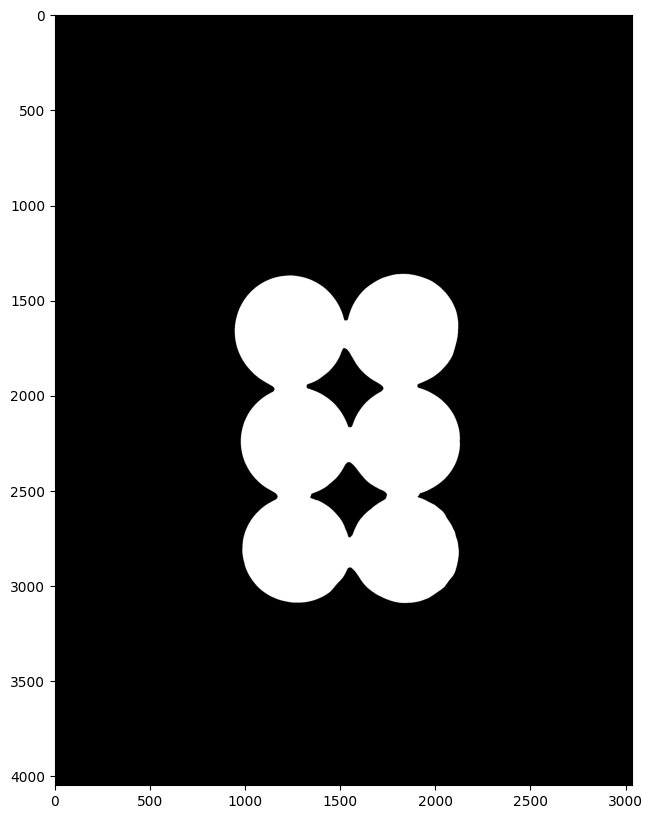

In [191]:
display(opening)

In [192]:
contours, _ = cv2.findContours(opening.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [193]:
for i in range(len(contours)):
    if _[0][i][3] == -1:
        cv2.drawContours(coin, contours, i , (255,0,0), 10)

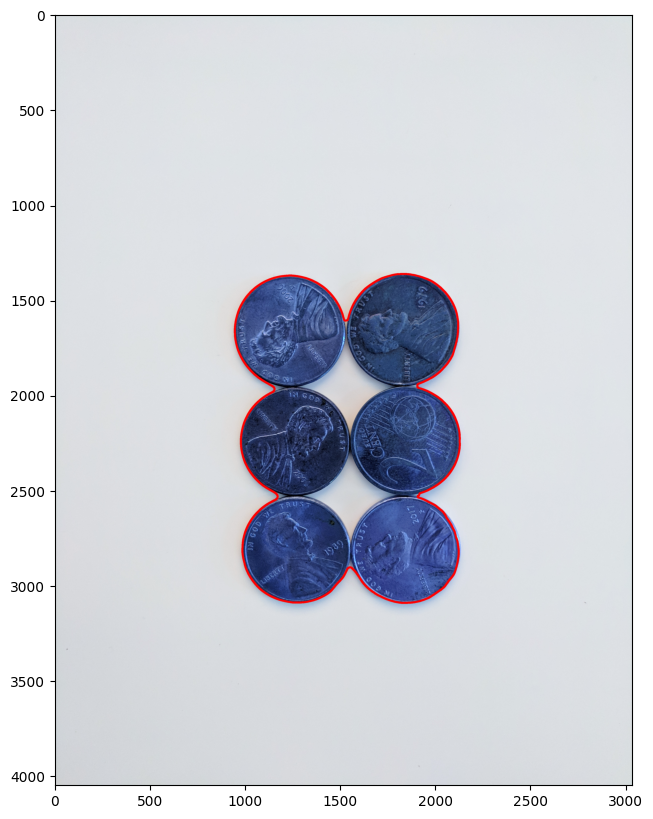

In [194]:
display(coin)

In [198]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

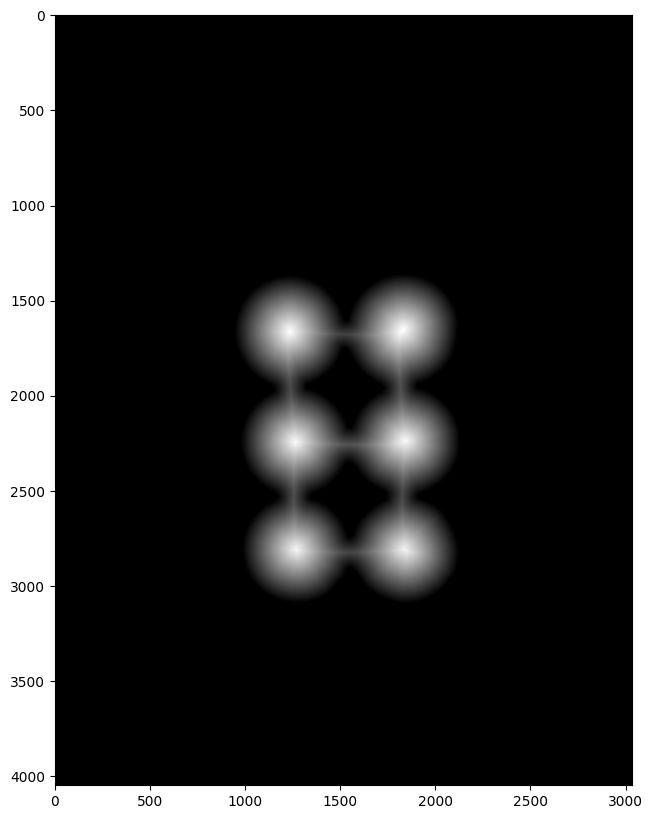

In [199]:
display(dist_transfor)

In [203]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

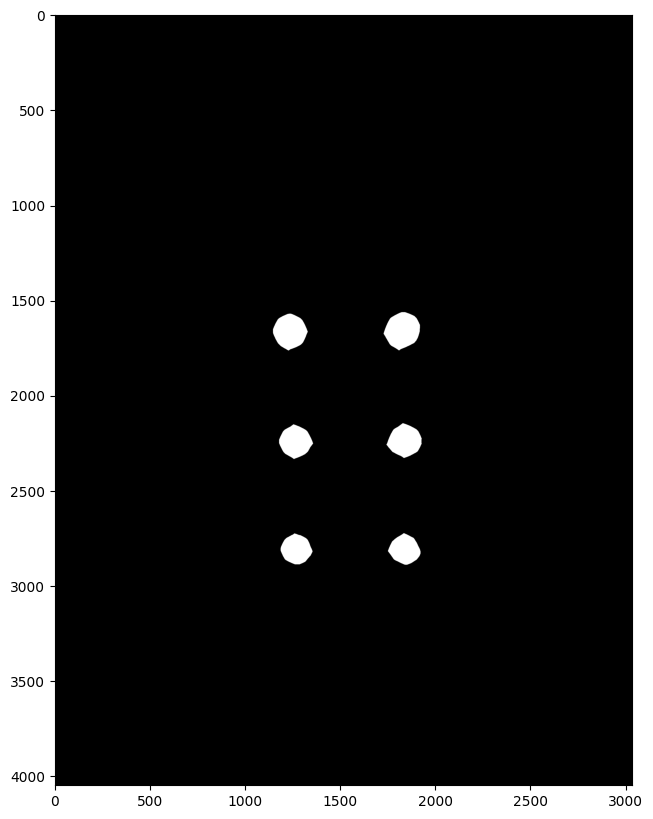

In [204]:
display(sure_fg)

In [205]:
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

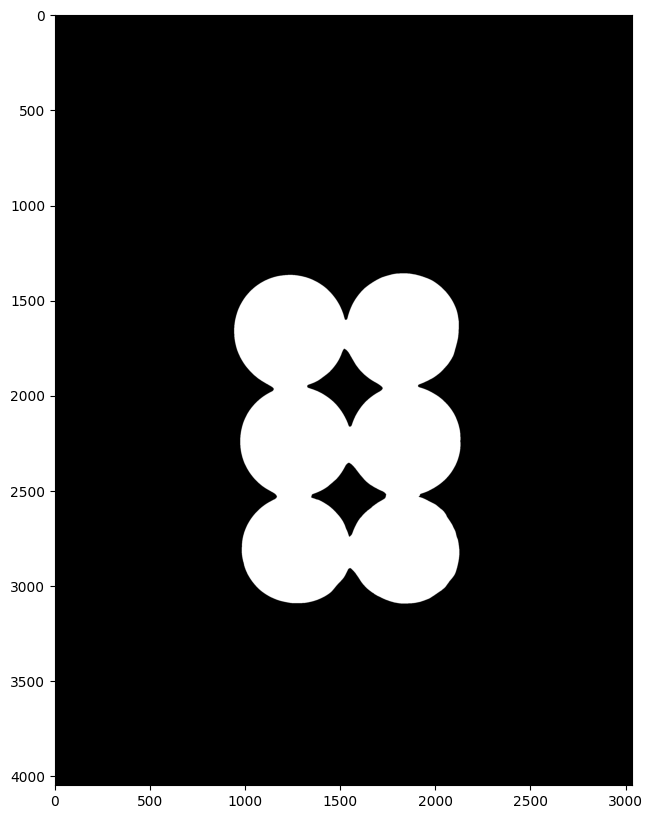

In [206]:
display(sure_bg)

In [207]:
sure_fg = np.uint8(sure_fg)

In [211]:
unknown = cv2.subtract(sure_bg,sure_fg)

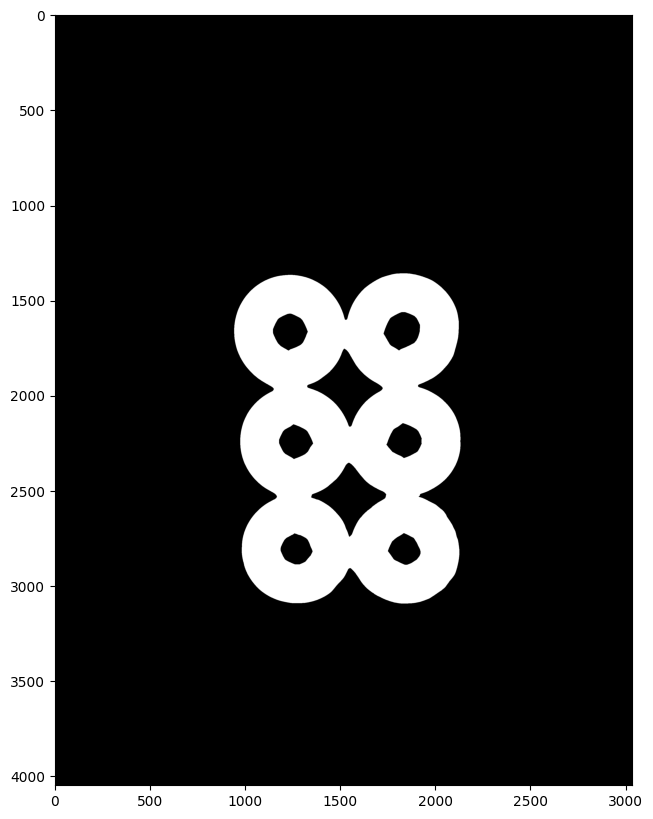

In [212]:
display(unknown)

In [213]:
ret, markers = cv2.connectedComponents(sure_fg)

In [216]:
markers[unknown==255] = 0

display(markers)

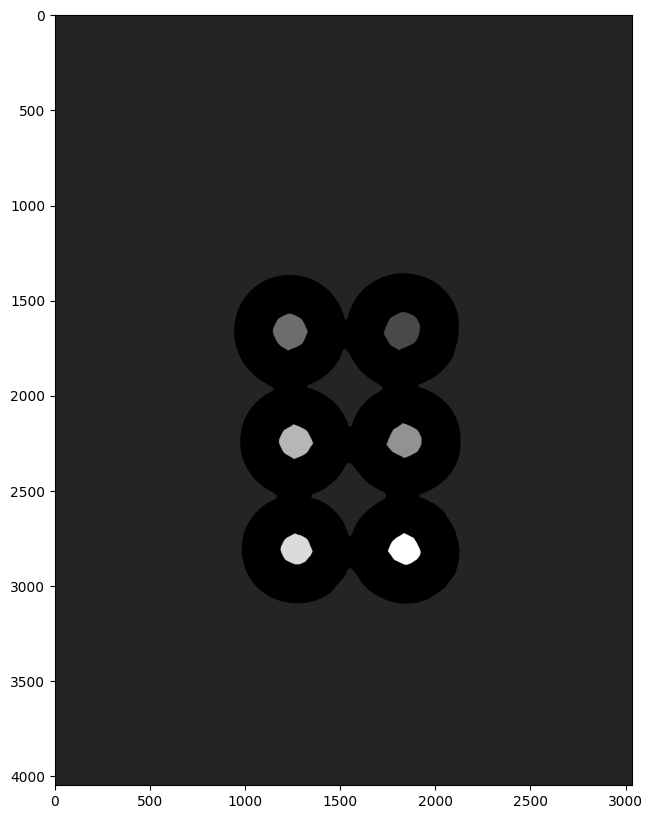

In [218]:
display(markers)

In [220]:
markers = cv2.watershed(coin, markers)

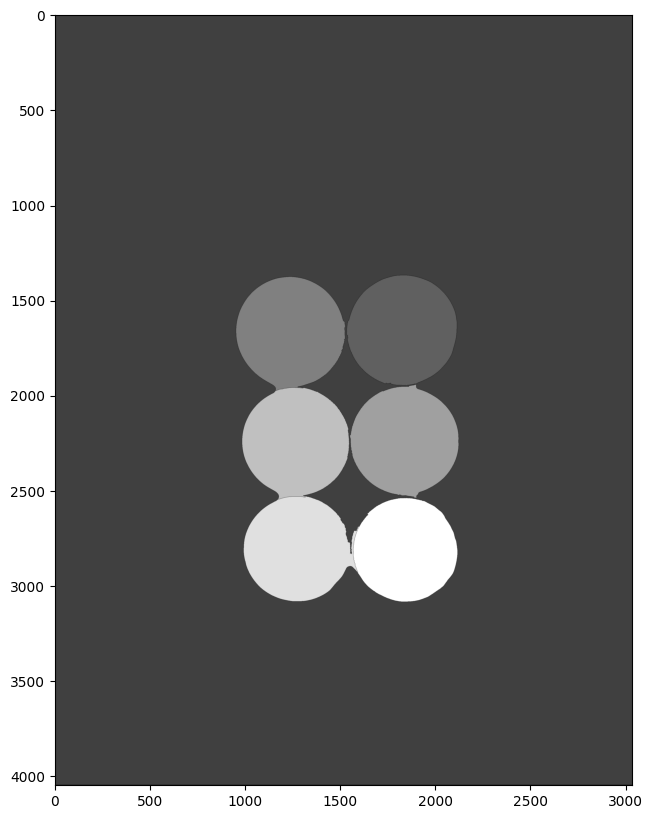

In [221]:
display(markers)

In [222]:
#finding contours 
contours, _ = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [223]:
#drawing contours
for i in range(len(contours)):
    if _[0][i][3] == -1:
        cv2.drawContours(coin, contours, i , (255,0,0), 10)

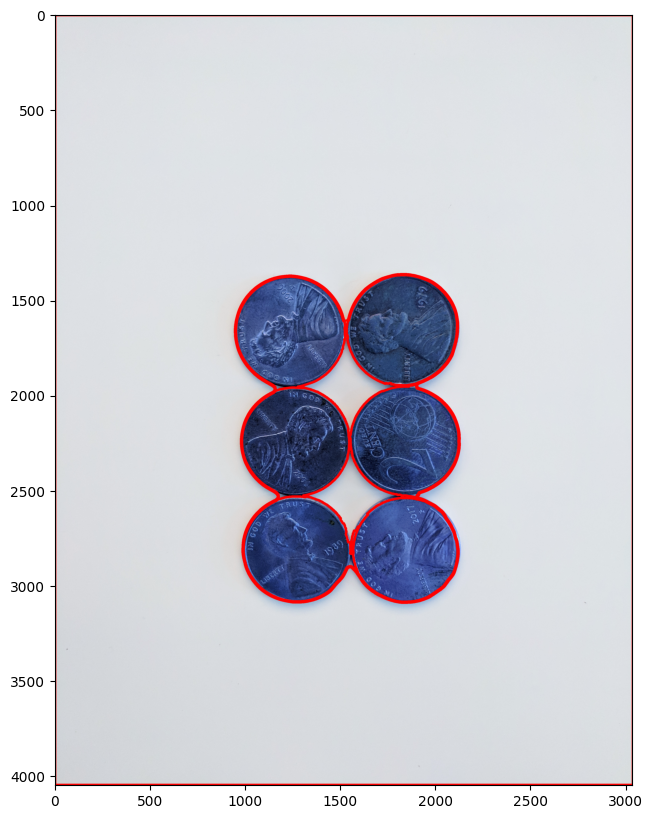

In [224]:
display(coin)